## Basic optimization

* method to pick best way

**Approach:**

1. Control variables: parameters to tune
2. Objective function: function of control variables that measures scalar quality or cost (what you are trying to maximize or minimize)
3. Constraints: relationships which must be satisfied by control variables 
    * Equality constraints: $=0$
    * Inequality constraints: $\leq 0$
4. Feasible set: allowed choices of control variables to satisfy constraints. 

Goal is to find combination fof control variables to maximize quality or minimize cost

**Classificaiton:**

1. Unconstrained vs constrained
2. Derivative-free vs derivative
    * Derivative free: Sometimes derivative not realistic to check (expensive or not availble). 
        * Called "Golden section approach"




### Unconstrained optimization with derivative free methods

from basic calculus

1. Compute derivative
2. Solve for where derivative = 0 to find max and min
3. Check sign or second derivative to determine max or min
    $f'(x_0) = 0 \text{ and } f''(x_0) \geq 0 \implies \text{ min}$

Multiple control variables

1. Use vector calculus: 

2. First derivative change: $\displaystyle{f'(x) = 0 \rightarrow \nabla f(\boldsymbol{x}) = \frac{\partial f}{\partial x_i}=0}$
3. Second derivative change: 
$f''(x) > 0 \rightarrow$ the Hessian, $\displaystyle{H(\boldsymbol{x}) = \big[ \frac{\partial^2 f}{\partial x_i \partial x_j} \big]}$, is positive (semi-)definite.

* Positive definite Hessian ($H(x^*) > 0$): local minimum at $x^*$.


### Golden section approach

* Continuous
* unimodal (only one minimum or maximum)

**Approach:**
Shrink interval with single minimum without computing derivatives
1. Compute function at 2 end points
2. Compute function at 2 points in between
2. Exclude part of interval with highest values



In [8]:
# example code for golden search
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**4 + 10*x*np.sin(x**2)

def goldensearch(f,x_left, x_right,tol, maxiter):
    '''
    Find minimum value of function of 1 variable within an interval
    
    Args:
        f: function to be minimized
        x_left, x_right: float interval endpoints (x_left<x_right)
        tol: float interval size for termination
        maxiter: int maximum number of iterations
        
    Returns:
        a,b: float bounds of final bounding interval
        val: float function value at center of final bounding interval
    '''
    phi = (1.+np.sqrt(5))/2 #golden ratio = (x2-a)/(b-a) = (b-x1)/(b-a)
    a = x_left
    b = x_right
    x1 = b - (b-a)/phi
    x2 = a + (b-a)/phi
    f1, f2 = f(x1), f(x2)
    for j in range(maxiter):
        if f1<f2: #move right boundary
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - (b-a)/phi#phi*a+(1-phi)*b
            f1 = f(x1)
        else: #move left boundary
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b-a)/phi#(1-phi)*a+phi*b
            f2 = f(x2)
        if(b-a)<tol:
            break
    val = f((a+b)/2)
    return a,b,val

In [2]:
a = -2
b = 1
tol = 1e-6
maxiter = 100
xleft, xright, val = goldensearch(f,a,b,tol, maxiter)
print("The minimum value f= " +str(val) + "occurs at x = " +str(xleft))


The minimum value f= -10.088219679436966occurs at x = -1.274178049042595


### Successive Parabolic interpolation

Another derivative free technique

python built in function

`scipy.optimize`

### Unconstrained optimization with derivatives

multidimentional example with n=2 control variables

Function: 
$f(x,y) = x^2 + 3 y^2$

Gradient:
$\displaystyle{\nabla f(\boldsymbol{x}) = \frac{\partial f}{\partial x} \hat{\boldsymbol{x}} + \frac{\partial f}{\partial y} \hat{\boldsymbol{y}} = 2x \, \hat{\boldsymbol{x}} + 6y \, \hat{\boldsymbol{y}}}$

**Method of Gradient descent**

1. Evaluate gradient at starting guess(which is somewhat close)
2. Move in direction opposite to gradient (direction of decreasing function values)
3. Continue until sufficiently close to minimum





In [3]:
# example gradient descent

f = lambda x : x[0]**2 + 3*x[1]**2

gradf = lambda x : np.array([2*x[0], 6*x[1]])

def grad_descent(f, gradf, x0, step, maxsteps, tol):
    x = np.zeros([maxsteps,2])
    val = np.zeros(maxsteps)
    x[0] = x0
    val[0] = f(x[0])
    for i in range(1,maxsteps):
        x[i] = x[i-1] - step * gradf(x[i-1])
        val[i] = f(x[i])
        if np.abs(val[i]-val[i-1])<tol:
            break
    return x,val,i

In [4]:
x0 = np.array([3,2])  # initial guess
maxsteps = 50
tol = 1e-4
step = 0.1

x,val,numsteps = grad_descent(f,gradf,x0,step,maxsteps,tol)

print("Steps to achieve tolerance: ", numsteps)
print("Min value f = ", val[numsteps])
print("History of function values: \n", val[:numsteps+1])
print("Coordinate history:\n", x[:numsteps])

Steps to achieve tolerance:  25
Min value f =  0.00012845229234353662
History of function values: 
 [2.10000000e+01 7.68000000e+00 3.99360000e+00 2.40844800e+00
 1.51781376e+00 9.67625933e-01 6.18676617e-01 3.95856398e-01
 2.53332633e-01 1.62130411e-01 1.03763067e-01 6.64082998e-02
 4.25013017e-02 2.72008315e-02 1.74085319e-02 1.11414604e-02
 7.13053463e-03 4.56354216e-03 2.92066698e-03 1.86922687e-03
 1.19630520e-03 7.65635326e-04 4.90006608e-04 3.13604229e-04
 2.00706707e-04 1.28452292e-04]
Coordinate history:
 [[3.00000000e+00 2.00000000e+00]
 [2.40000000e+00 8.00000000e-01]
 [1.92000000e+00 3.20000000e-01]
 [1.53600000e+00 1.28000000e-01]
 [1.22880000e+00 5.12000000e-02]
 [9.83040000e-01 2.04800000e-02]
 [7.86432000e-01 8.19200000e-03]
 [6.29145600e-01 3.27680000e-03]
 [5.03316480e-01 1.31072000e-03]
 [4.02653184e-01 5.24288000e-04]
 [3.22122547e-01 2.09715200e-04]
 [2.57698038e-01 8.38860800e-05]
 [2.06158430e-01 3.35544320e-05]
 [1.64926744e-01 1.34217728e-05]
 [1.31941395e-01 5.

In [5]:
# contour plot

n=25
xvals = np.linspace(-3,3,n)
yvals = np.linspace(-3,3,n)
fvals = np.zeros([n,n])
f2 = lambda x,y:x**2+3*y**2
for i in range(n):
    for j in range(n):
        fvals[j,i] =  f2(xvals[i],yvals[j])

In [6]:
def arraycontourplot(x,xvals, yvals, fvals, levels=[-1000,0], labels=['x','y'], 
    titlestring='', filled=False):
    """
    inputs:
    xvals: a 1d numpy array of values for the first coordinate
    yvals: a 1d numpy array of values for the second coordinate
    fvals: a 2d numpy array of function values on the coordinate grid
    levels: a list of contour values
    vars: a list containing the symbolic variables
    titlestring: a string specifying the plot title
    -----
    product: a contourplot based on the array of function values
    """
    fig = plt.figure()
    X,Y = np.meshgrid(yvals,xvals) #switch for more intuitive format
    if filled==True:
        cp = plt.contourf(X, Y, fvals, levels, hatches=['x','+']) #, linestyles='dashed')
    else:
        cp = plt.contour(X, Y, fvals, levels) #, linestyles='dashed')
    # plt.clabel(cp, inline=True, fontsize=10)
    plt.title(titlestring)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    #plt.axis('square')
    plt.axis('tight')
    plt.plot(x.T[0],x.T[1], marker='o', markersize=10, fillstyle='none', linewidth=2)
    plt.show()
    return cp

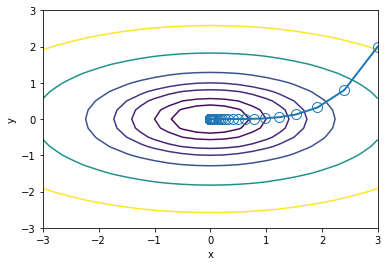

In [9]:
levels=[0,0.5,1,2,3,5,10,20]
arraycontourplot(x,xvals, yvals, fvals, levels, labels=['x','y'], 
    titlestring='', filled=False)

# the gradient descent does move perpendicular to level sets or isosurfaces and eventually arrives near minimum at origin

### An improvement

Instead of a step of predermined size

1. Use starting point and gradient to define a line 
2. Do a line search to find minimum value of the line 
3. Recompute gradient and repeat

This results in a zig zag path

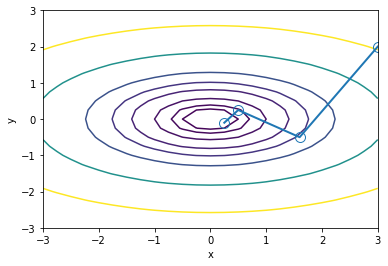

In [10]:
levels=[0,0.25,0.5,1,2,3.1,5,10,20]
x =  np.array([[3,2],[1.6,-0.5],[0.5,0.25], [0.25,-0.1]])
arraycontourplot(x,xvals, yvals, fvals, levels, labels=['x','y'], 
    titlestring='', filled=False)